In [1]:
# imports
import numpy as np
from scipy.signal import StateSpace, lsim, dlsim
import matplotlib.pyplot as plt

In [13]:
# define given variables
G = np.array([[1.0, 0.2, 0.1], [0.1, 2.0, 0.1], [0.3, 0.1, 3]])
# gamma = 3
gamma = 5
alpha = 1.2
sigma = 0.1

# initial condition 1
p10 = 0.1
p20 = 0.1
p30 = 0.1 

p_arr1 = [p10, p20, p30]

# initial condition 2
p11 = 0.1
p21 = 0.01
p31 = 0.02

p_arr2 = [p11, p21, p31]


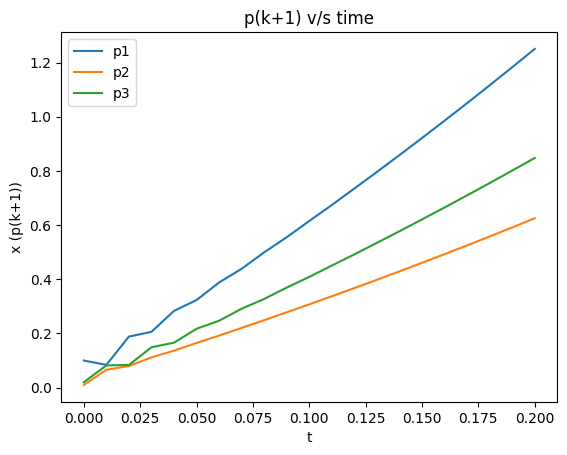

In [16]:
# defining linear system 1 (with output si)
A = (alpha*gamma)*np.array([[0, (G[0,1]/G[0,0]), G[0,2]/G[0,0]],
              [(G[1,0]/G[1,1]), 0, G[1,2]/G[1,1]],
              [(G[2,0]/G[2,2]), G[2,1]/G[2,2], 0]])
B = (alpha*gamma)*np.array([(1/G[0,0]), (1/G[1,1]), (1/G[2,2])]).reshape((3,1))

C1 = np.diag([G[0,0], G[1,1], G[2,2]])
D1 = np.array([0,0,0]).reshape((3,1))

si_sys1 = StateSpace(A, B, C1, D1, dt=0.01)

# define simulation steps in time
t_dt = np.linspace(0, 0.2, num=1000)
u_dt = (sigma**2)*np.ones(t_dt.size)

# set up sim
t_dt, _, x_dt = dlsim(si_sys1, u_dt, t_dt,  x0 = p_arr2)

# plot
plt.plot(t_dt, x_dt)
plt.ylabel('x (p(k+1))')
plt.xlabel('t')
plt.title("p(k+1) v/s time")
plt.legend(['p1', 'p2', 'p3'])
plt.show()


In [ ]:
# defining linear system 1 (with output qi)
C2 = G - C1
D2 = (sigma**2)*np.array([1,1,1]).reshape((3,1))

si_sys2 = StateSpace(A, B, C2, D2, dt=0.01)

# define simulation steps in time
t_dt = np.linspace(0, 20, num=1000)
u_dt = (sigma**2)*np.ones(t_dt.size)

# set up sim
t_dt, qi_dt, x_dt = dlsim(si_sys2, u_dt, t_dt,  x0 = p_arr2)

# plot
plt.plot(t_dt, x_dt)
plt.ylabel('x (p(k+1))')
plt.xlabel('t')
plt.title("p(k+1) v/s time")
plt.legend(['p1', 'p2', 'p3'])
plt.show()


In [ ]:
# plot Si = si/qi (dividing two linear eqns method- not valid (need to ask prof why))
Si_dt = si_dt/qi_dt
target_Si = (alpha*gamma)*np.ones_like(Si_dt)

# plot
plt.plot(t_dt, Si_dt)
plt.plot(t_dt, target_Si, '--')
plt.ylabel('(Si(k))')
plt.xlabel('t')
plt.title("Si v/s time")
plt.legend(['S1', 'S2', 'S3', 'target_Si'])
plt.xlim([0, 0.4])
plt.show()

[0.1  0.01 0.02]
[0.084 0.066 0.082]
[0.1884 0.0798 0.0836]
[0.20592 0.1116  0.149  ]
[0.28332  0.136476 0.165872]
[0.3232944 0.1647576 0.2172872]
[0.38808144 0.19217448 0.24692816]
[0.43876627 0.22050288 0.29128376]
[0.49937371 0.24901501 0.32736034]
[0.55523422 0.27802022 0.36942723]
[0.6152806  0.30739843 0.40874457]
[0.67412486 0.33720755 0.45064804]
[0.73503789 0.36743187 0.49191643]
[0.7960681  0.39808629 0.53450911]
[0.85840902 0.42917316 0.57725812]
[0.92136267 0.46070014 0.62088004]
[0.9853682  0.49267281 0.66495763]
[1.05018195 0.52509775 0.70975548]
[1.11597058 0.55798123 0.75512872]
[1.18265471 0.59132979 0.8011786 ]
[1.25030291 0.62514999 0.84785878]


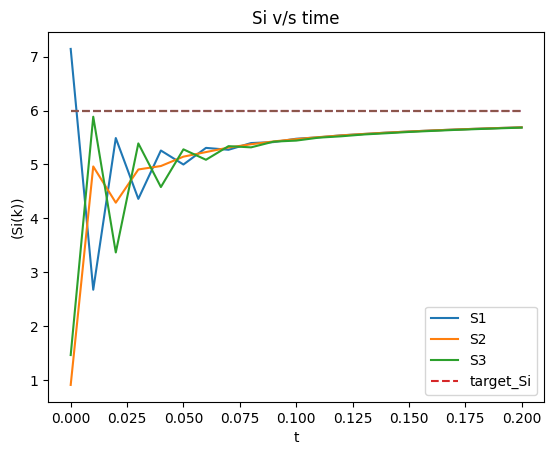

In [17]:
# plot Si = si/qi (direct method)
Si_dt = np.ones_like(x_dt)
for index, pk in enumerate(x_dt):
    print(pk)
    Sik = np.array([(G[0,0]*pk[0])/((sigma**2) + G[0, 1]*pk[1] + G[0, 2]*pk[2]),
                   (G[1,1]*pk[1])/((sigma**2) + G[1, 0]*pk[0] + G[1, 2]*pk[2]),
                   (G[2,2]*pk[2])/((sigma**2) + G[2, 0]*pk[0] + G[2, 1]*pk[1])])
    Si_dt[index, :] = Sik

target_Si = (alpha*gamma)*np.ones_like(Si_dt)

# plot
plt.plot(t_dt, Si_dt)
plt.plot(t_dt, target_Si, '--')
plt.ylabel('(Si(k))')
plt.xlabel('t')
plt.title("Si v/s time")
plt.legend(['S1', 'S2', 'S3', 'target_Si'])
# plt.xlim([0, 0.4])
plt.show()